<a href="https://colab.research.google.com/github/latifurrahmanalhamida/PCVK_244107027017_M-LATIFUR/blob/main/Tugas_PCVK_M_Latifur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!pip install supervision

!yolo task=detect mode=train model=yolov8n.pt data=coco128.yaml epochs=1 imgsz=640

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 4.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 79.0MB/s]
Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction

In [4]:
!pip install ultralytics
!pip install supervision

In [2]:
!pip install --upgrade ultralytics supervision

In [8]:
!pip install matplotlib-venn

In [9]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [12]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [11]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 31.5 MB/s eta 0:00:00


In [18]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 14.2 MB/s eta 0:00:00



0: 640x480 5 cars, 192.8ms
Speed: 4.7ms preprocess, 192.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


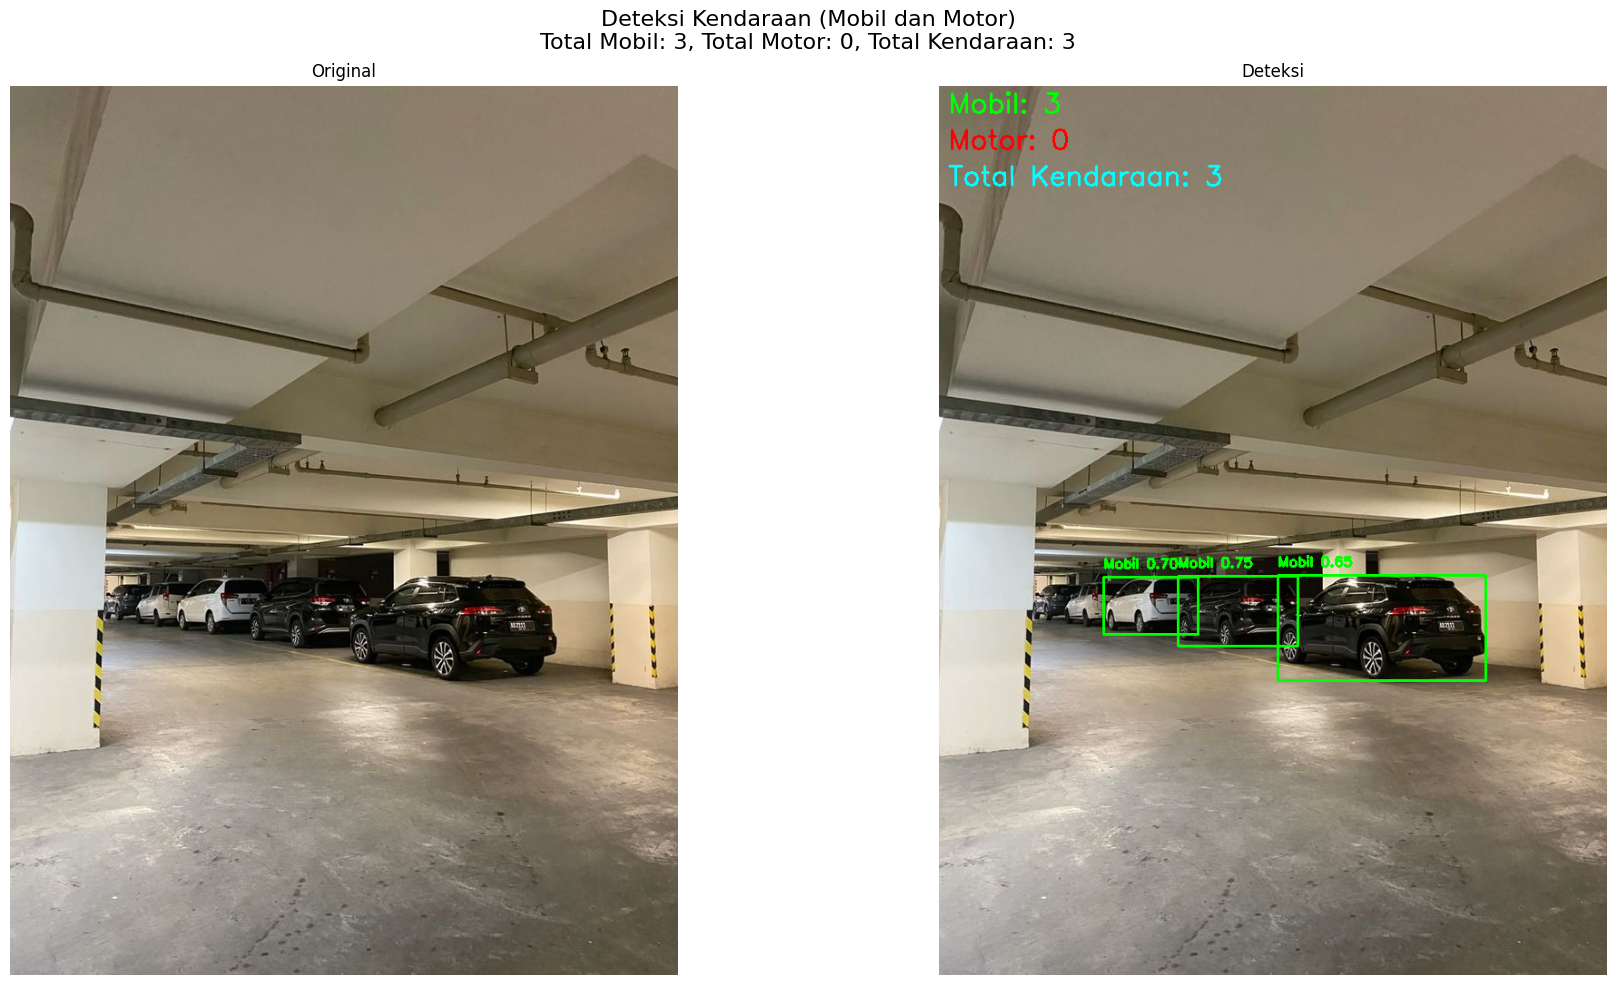


Hasil Deteksi:
Total Mobil: 3
Total Motor: 0
Total Kendaraan: 3


In [22]:
import torch
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

def detect_vehicles(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Gagal membaca gambar {image_path}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(image_rgb)[0]  # Get only the first result

    # Initialize counters
    total_cars = 0
    total_motorcycles = 0

    # Copy image for annotation
    annotated_image = image_rgb.copy()

    # Process each detection
    for box in results.boxes:
        # Get box coordinates
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Get class_id and confidence
        class_id = int(box.cls.cpu().numpy()[0])
        conf = float(box.conf.cpu().numpy()[0])

        # Define confidence threshold
        confidence_threshold = 0.5  # Adjust as needed

        # If detection is a car (class 2)
        if class_id == 2 and conf >= confidence_threshold:
            total_cars += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_image, f'Mobil {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # If detection is a motorcycle (class 3)
        elif class_id == 3 and conf >= confidence_threshold:
            total_motorcycles += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(annotated_image, f'Motor {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Add statistics to the image
    cv2.putText(annotated_image, f"Mobil: {total_cars}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(annotated_image, f"Motor: {total_motorcycles}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(annotated_image, f"Total Kendaraan: {total_cars + total_motorcycles}", (10, 110),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    return image_rgb, annotated_image, total_cars, total_motorcycles

def display_results(original_image, annotated_image, total_cars, total_motorcycles):
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Display original image
    ax1.imshow(original_image)
    ax1.set_title("Original")
    ax1.axis('off')

    # Display annotated image
    ax2.imshow(annotated_image)
    ax2.set_title("Deteksi")
    ax2.axis('off')

    # Add overall title with statistics
    plt.suptitle(f"Deteksi Kendaraan (Mobil dan Motor)\nTotal Mobil: {total_cars}, Total Motor: {total_motorcycles}, Total Kendaraan: {total_cars + total_motorcycles}", fontsize=16)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Image path
    image_path = '/content/drive/MyDrive/pcvk/parkiran 2.jpg'

    try:
        # Process detection
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # Display results
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # Print detection results
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")
